In [1]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(1)
import matplotlib as mpl
import pandas as pd


pd.set_option('display.max_columns', None)
#pd.set_option("mode.chained_assignment", "raise")
#pd.set_option('display.max_rows', None)

In [2]:
state = 'new mexico'
state_abbrev = 'NM'

#### Read in MOVES emission factors dataset and Evolved VMT by vintage dataset.

In [3]:
#To estimate emissions for Colorado HPMS vehicle types, can alternatively use emission factors (by road type) data sent by Dale Wells @ CDPHE.
emissionfactors = pd.read_excel('../Transportation/EPA_MOVES2014a_StateEmissionFactors.xlsx')
state_emissionfactors = emissionfactors[emissionfactors['State']== state.upper()]
#state_emissionfactors.drop(columns='State', inplace=True)

In [9]:
medium_longhaul_inds = state_emissionfactors['Vehicle type']=='Single unit long-haul truck, gasoline'
state_emissionfactors = state_emissionfactors[~medium_longhaul_inds]

In [5]:
vmt_by_vintage = pd.read_csv('../Evolved/evolved_demand_outputs/Transportation VMT.txt', low_memory = False, header=None, 
                             names=['Demand Technology','Other Index 1','Scenario','Subsector','Vintage','Western States','Year','VMT(SUM)'])

In [6]:
vmt_by_vintage

,Demand Technology,Other Index 1,Scenario,Subsector,Vintage,Western States,Year,VMT(SUM)
0,Diesel Hybrid Heavy-Duty Vehicle,long-haul,100% RENEWABLE,heavy duty trucks,2050,colorado,2017,0.0
1,Diesel Hybrid Heavy-Duty Vehicle,long-haul,100% RENEWABLE,heavy duty trucks,2050,colorado,2018,0.0
2,Diesel Hybrid Heavy-Duty Vehicle,long-haul,100% RENEWABLE,heavy duty trucks,2050,colorado,2019,0.0
3,Diesel Hybrid Heavy-Duty Vehicle,long-haul,100% RENEWABLE,heavy duty trucks,2050,colorado,2020,0.0
4,Diesel Hybrid Heavy-Duty Vehicle,long-haul,100% RENEWABLE,heavy duty trucks,2050,colorado,2021,0.0
...,...,...,...,...,...,...,...,...
1720735,Hybrid electric Transit bus,NaN,SLOW ELECTRICITY,transit buses,2013,new mexico,2046,0.0
1720736,Hybrid electric Transit bus,NaN,SLOW ELECTRICITY,transit buses,2013,new mexico,2047,0.0
1720737,Hybrid electric Transit bus,NaN,SLOW ELECTRICITY,transit buses,2013,new mexico,2048,0.0
1720738,Hybrid electric Transit bus,NaN,SLOW ELECTRICITY,transit buses,2013,new mexico,2049,0.0


In [25]:
state_vmt_by_vintage = vmt_by_vintage[vmt_by_vintage['Western States']==state] 

#### Extrapolate MOVES emission factors to 2050, using 2020 emission factors for 2020-2050.

In [28]:
start = 2020
for i in range(31):
    state_emissionfactors[str(start+i)] = state_emissionfactors['2019']

#### Derive vehicle age distribution for conventional vehicles from Evolved stock dataset.

In [29]:
#Filter for just conventional vehicles.
conventional_vehicles = [
    'Reference Gasoline Light-Duty Auto',
    'Reference Gasoline Light-Duty Truck',
    'Reference TDI Light-Duty Auto', 
    'Reference TDI Light-Duty Truck',
    'Reference Diesel Heavy-Duty Vehicle',
    'Reference Gasoline Heavy-Duty Vehicle',
    'Reference Medium - Duty Diesel Vehicle',
    'Reference Medium-Duty Gasoline Vehicle',
    'CNG Transit bus',
    'Diesel Transit bus']

conventional_vmt_by_vintage = state_vmt_by_vintage[state_vmt_by_vintage['Demand Technology'].isin(conventional_vehicles)]

other_index_inds = conventional_vmt_by_vintage['Other Index 1'].isna()==False
conventional_vmt_by_vintage.loc[other_index_inds,'Demand Technology']=conventional_vmt_by_vintage.loc[other_index_inds,'Demand Technology']+ '_' + conventional_vmt_by_vintage.loc[other_index_inds,'Other Index 1']
conventional_vmt_by_vintage.columns = conventional_vmt_by_vintage.columns.str.upper()

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [34]:
conventional_vmt_by_vintage

,DEMAND TECHNOLOGY,OTHER INDEX 1,SCENARIO,SUBSECTOR,VINTAGE,WESTERN STATES,YEAR,VMT(SUM)
1153280,Reference Diesel Heavy-Duty Vehicle_long-haul,long-haul,100% RENEWABLE,heavy duty trucks,2050,new mexico,2017,0.0
1153281,Reference Diesel Heavy-Duty Vehicle_long-haul,long-haul,100% RENEWABLE,heavy duty trucks,2050,new mexico,2018,0.0
1153282,Reference Diesel Heavy-Duty Vehicle_long-haul,long-haul,100% RENEWABLE,heavy duty trucks,2050,new mexico,2019,0.0
1153283,Reference Diesel Heavy-Duty Vehicle_long-haul,long-haul,100% RENEWABLE,heavy duty trucks,2050,new mexico,2020,0.0
1153284,Reference Diesel Heavy-Duty Vehicle_long-haul,long-haul,100% RENEWABLE,heavy duty trucks,2050,new mexico,2021,0.0
...,...,...,...,...,...,...,...,...
1718151,Diesel Transit bus,NaN,SLOW ELECTRICITY,transit buses,2013,new mexico,2046,0.0
1718152,Diesel Transit bus,NaN,SLOW ELECTRICITY,transit buses,2013,new mexico,2047,0.0
1718153,Diesel Transit bus,NaN,SLOW ELECTRICITY,transit buses,2013,new mexico,2048,0.0
1718154,Diesel Transit bus,NaN,SLOW ELECTRICITY,transit buses,2013,new mexico,2049,0.0


In [35]:
conventional_vmt_by_vintage['Total VMT'] = conventional_vmt_by_vintage.groupby(['SCENARIO', 'DEMAND TECHNOLOGY','SUBSECTOR','YEAR'])['VMT(SUM)'].transform('sum')
conventional_vmt_by_vintage['Vintage Fraction VMT']= conventional_vmt_by_vintage['VMT(SUM)']/conventional_vmt_by_vintage['Total VMT']


<ipython-input-35-3ecf4aca585a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conventional_vmt_by_vintage['Total VMT'] = conventional_vmt_by_vintage.groupby(['SCENARIO', 'DEMAND TECHNOLOGY','SUBSECTOR','YEAR'])['VMT(SUM)'].transform('sum')
<ipython-input-35-3ecf4aca585a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conventional_vmt_by_vintage['Vintage Fraction VMT']= conventional_vmt_by_vintage['VMT(SUM)']/conventional_vmt_by_vintage['Total VMT']


In [36]:
# conventional_vmt_by_vintage['Total Subsector VMT'] = conventional_vmt_by_vintage.groupby(['SCENARIO','SUBSECTOR','YEAR'])['VMT (SUM)'].transform('sum')
# conventional_vmt_by_vintage['Vintage Fraction Subsector VMT']= conventional_vmt_by_vintage['VMT (SUM)']/conventional_vmt_by_vintage['Total VMT']


In [37]:
conventional_vmt_by_vintage['DEMAND TECHNOLOGY'].unique()

array(['Reference Diesel Heavy-Duty Vehicle_long-haul',
       'Reference Gasoline Heavy-Duty Vehicle_long-haul',
       'Reference Diesel Heavy-Duty Vehicle_short-haul',
       'Reference Gasoline Heavy-Duty Vehicle_short-haul',
       'Reference Gasoline Light-Duty Auto',
       'Reference TDI Light-Duty Auto',
       'Reference Gasoline Light-Duty Truck_light commercial trucks',
       'Reference TDI Light-Duty Truck_light commercial trucks',
       'Reference Gasoline Light-Duty Truck_light trucks',
       'Reference TDI Light-Duty Truck_light trucks',
       'Reference Medium - Duty Diesel Vehicle',
       'Reference Medium-Duty Gasoline Vehicle', 'CNG Transit bus',
       'Diesel Transit bus'], dtype=object)

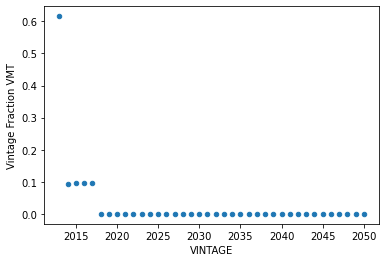

In [38]:
vehicle = conventional_vmt_by_vintage['DEMAND TECHNOLOGY']=='Diesel Transit bus'
year = conventional_vmt_by_vintage['YEAR']==2017
scen = conventional_vmt_by_vintage['SCENARIO']=='REFERENCE'

veh_year = conventional_vmt_by_vintage[vehicle & year & scen]

veh_year.plot(kind='scatter',x='VINTAGE',y='Vintage Fraction VMT')

#### Map MOVES vehicle types to Evolved vehicle types

In [39]:
vehicle_mapping = {
        'Passenger car, gasoline': 'Reference Gasoline Light-Duty Auto',
        'Light commercial truck, gasoline': 'Reference Gasoline Light-Duty Truck_light commercial trucks',
        'Passenger truck, gasoline':'Reference Gasoline Light-Duty Truck_light trucks',
        'Passenger car, diesel':'Reference TDI Light-Duty Auto',
        'Light commercial truck, diesel':'Reference TDI Light-Duty Truck_light commercial trucks',
        'Passenger truck, diesel':'Reference TDI Light-Duty Truck_light trucks',
        'Combination long-haul truck, diesel': 'Reference Diesel Heavy-Duty Vehicle_long-haul',
        'Combination short-haul truck, diesel': 'Reference Diesel Heavy-Duty Vehicle_short-haul',
        'Single unit long-haul truck, diesel':'Reference Medium - Duty Diesel Vehicle',
        'Single unit long-haul truck, gasoline':'Reference Medium-Duty Gasoline Vehicle',
        'Single unit short-haul truck, diesel':'Reference Medium - Duty Diesel Vehicle',
        'Single unit short-haul truck, gasoline':'Reference Medium-Duty Gasoline Vehicle',
        'Refuse truck, diesel': 'Reference Medium - Duty Diesel Vehicle',
        'Transit bus, CNG':'CNG Transit bus',
        'Transit bus, diesel': 'Diesel Transit bus',
        'School bus, diesel':'Diesel Transit bus',
        'School bus, gasoline': 'Diesel Transit bus'}


In [40]:
# initialize new DF with columns for each analysis year
scenarios = conventional_vmt_by_vintage['SCENARIO'].unique()

weighted_efs_by_year = state_emissionfactors[['State', 'Vehicle type', 'Pollutant (g/mi)']]
analysis_years = np.arange(2017, 2051)
for i in analysis_years:
    weighted_efs_by_year[str(i)]= np.nan

weighted_efs_by_year_scenario = pd.concat([weighted_efs_by_year]*len(scenarios), keys=scenarios).reset_index()
weighted_efs_by_year_scenario.drop(columns=['level_1'],inplace=True)
weighted_efs_by_year_scenario.rename(columns={'level_0':'Scenario'},inplace=True)

<ipython-input-40-1dab21348ece>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weighted_efs_by_year[str(i)]= np.nan


### Populate model years before 2006 for heavy duty and medium duty trucks.

In [42]:
#Comment out if not Nevada.
#scenarios = ['100% RENEWABLE', 'CENTRAL', 'LOW DEMAND', 'REFERENCE']

#loop through scenarios
for scenario in weighted_efs_by_year_scenario['Scenario'].unique():
    scenario_inds_weighted_efs = weighted_efs_by_year_scenario['Scenario']==scenario
    scenario_inds_fraction = conventional_vmt_by_vintage['SCENARIO']==scenario
    
#loop through vehicle types
    for vehicle in weighted_efs_by_year_scenario['Vehicle type'].unique():
        veh_inds_efs = state_emissionfactors['Vehicle type']==vehicle
        veh_inds_weighted_efs = weighted_efs_by_year_scenario['Vehicle type']==vehicle
        
        vintage_fraction_vehicle = vehicle_mapping[vehicle]
        vintage_fraction_vehicle_inds = conventional_vmt_by_vintage['DEMAND TECHNOLOGY']==vintage_fraction_vehicle

#loop through pollutants
        for pol in weighted_efs_by_year_scenario['Pollutant (g/mi)'].unique():
            pol_inds_efs = state_emissionfactors['Pollutant (g/mi)']==pol
            pol_inds_weighted_efs = weighted_efs_by_year_scenario['Pollutant (g/mi)']==pol
            
            pol_veh_inds_efs = pol_inds_efs & veh_inds_efs
            grams_per_mile = state_emissionfactors[pol_veh_inds_efs]
            grams_per_mile_years = grams_per_mile.iloc[:,3:]
              
#loop through analysis years
            for year in weighted_efs_by_year_scenario.columns[4:]:
                           
                year_inds_fraction = conventional_vmt_by_vintage['YEAR']== int(year)
                
                #index into scenario, vehicle type, and analysis year to get VMT fraction by vehicle vintage
                all_fraction_inds = vintage_fraction_vehicle_inds & year_inds_fraction & scenario_inds_fraction
                vintage_fraction_list = conventional_vmt_by_vintage.loc[all_fraction_inds][['VINTAGE','Vintage Fraction VMT']]
                vintage_fraction_list['VINTAGE'] = vintage_fraction_list['VINTAGE'].astype(str)
                
                oldest_vintage = int(vintage_fraction_list['VINTAGE'].iloc[-1])
                
                if year == '2017':
                    window = 28
                    time_window_start = int(year) - window
                elif year == '2018':
                    window = 29
                    time_window_start = int(year) - window
                else:
                    window = 30
                    time_window_start = int(year) - window
                
                if oldest_vintage > time_window_start:

                    current_window = int(year)-oldest_vintage
                    window_expansion = window-current_window
                    denominator = window_expansion+1
                    oldest_vmt_fraction = vintage_fraction_list['Vintage Fraction VMT'].iloc[-1]
                    division = oldest_vmt_fraction/denominator
                    
                    for i in range(window_expansion-1,-1,-1):
                        row_year = time_window_start+i
                        row_addition = pd.DataFrame([[str(row_year),division]], 
                            columns=['VINTAGE','Vintage Fraction VMT'])

                        vintage_fraction_list = pd.concat([vintage_fraction_list,row_addition],ignore_index=True)
                    
                    vintage_fraction_list.loc[vintage_fraction_list['VINTAGE']==str(oldest_vintage),'Vintage Fraction VMT'] = division
                    
                vintage_years_list = vintage_fraction_list['VINTAGE'].tolist()
                grams_per_mile_years_filtered = grams_per_mile_years[vintage_years_list]
                
                vintage_fraction = vintage_fraction_list['Vintage Fraction VMT']
                
                weighted_avg = np.dot(grams_per_mile_years_filtered, vintage_fraction)
              
                #index into scenario, vehicle type, and pollutant where the weighted ef will go
                all_weighted_ef_inds = scenario_inds_weighted_efs & veh_inds_weighted_efs & pol_inds_weighted_efs
                weighted_efs_by_year_scenario.loc[all_weighted_ef_inds, str(year)] = weighted_avg
               

In [43]:
weighted_efs_by_year_scenario

,Scenario,State,Vehicle type,Pollutant (g/mi),2017,2018,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030,2031,2032,2033,2034,2035,2036,2037,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050
0,100% RENEWABLE,NEW MEXICO,"Combination long-haul truck, diesel",CO,3.373920,3.070958,2.814785,2.577932,2.350082,2.218994,2.117846,2.034504,1.979421,1.944231,1.920908,1.905926,1.897072,1.891223,1.887806,1.885750,1.884576,1.883925,1.883546,1.883315,1.883182,1.883105,1.883058,1.883032,1.883016,1.883008,1.883004,1.883002,1.883001,1.883000,1.883000,1.883000,1.883000,1.883000
1,100% RENEWABLE,NEW MEXICO,"Combination short-haul truck, diesel",CO,1.887142,1.576947,1.316080,1.065772,0.832157,0.702400,0.604245,0.523574,0.470699,0.437344,0.415435,0.401282,0.392907,0.387321,0.384028,0.381979,0.380788,0.380094,0.379676,0.379406,0.379244,0.379145,0.379083,0.379046,0.379024,0.379013,0.379006,0.379003,0.379001,0.379001,0.379000,0.379000,0.379000,0.379000
2,100% RENEWABLE,NEW MEXICO,"Light commercial truck, diesel",CO,2.971178,2.746472,2.522016,2.300171,2.094945,1.905695,1.731065,1.571059,1.425036,1.289278,1.169335,1.063745,0.971699,0.891940,0.823237,0.765053,0.716255,0.675808,0.642799,0.616251,0.595293,0.579088,0.566829,0.557761,0.551208,0.546584,0.543412,0.541307,0.539950,0.539108,0.538606,0.538318,0.538160,0.538077
3,100% RENEWABLE,NEW MEXICO,"Light commercial truck, gasoline",CO,5.861420,5.062606,4.374484,3.790916,3.292396,2.874336,2.521689,2.226804,1.982187,1.772957,1.603892,1.467837,1.359052,1.272273,1.203181,1.148598,1.105597,1.071882,1.045600,1.025254,1.009693,0.997946,0.989214,0.982831,0.978251,0.975033,0.972826,0.971359,0.970406,0.969810,0.969449,0.969240,0.969123,0.969060
4,100% RENEWABLE,NEW MEXICO,"Passenger car, diesel",CO,3.829021,3.650225,3.477021,3.307642,3.147773,2.996336,2.851573,2.712360,2.577807,2.447274,2.319990,2.195396,2.072901,1.951914,1.832029,1.713021,1.594878,1.478017,1.363433,1.252749,1.148162,1.052318,0.967822,0.896618,0.839526,0.796142,0.764885,0.743624,0.729742,0.721084,0.715938,0.713031,0.711473,0.710680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,SLOW ELECTRICITY,NEW MEXICO,"Single unit long-haul truck, diesel",VOC (Evap),0.022738,0.022326,0.021939,0.021551,0.021226,0.020958,0.020767,0.020611,0.020483,0.020382,0.020303,0.020239,0.020185,0.020142,0.020105,0.020074,0.020051,0.020032,0.020018,0.020009,0.020003,0.020001,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000
636,SLOW ELECTRICITY,NEW MEXICO,"Single unit short-haul truck, diesel",VOC (Evap),0.023168,0.022566,0.021998,0.021411,0.020927,0.020528,0.020247,0.020012,0.019817,0.019664,0.019541,0.019439,0.019351,0.019278,0.019213,0.019159,0.019116,0.019081,0.019051,0.019028,0.019013,0.019004,0.019001,0.019000,0.019000,0.019000,0.019000,0.019000,0.019000,0.019000,0.019000,0.019000,0.019000,0.019000
637,SLOW ELECTRICITY,NEW MEXICO,"Single unit short-haul truck, gasoline",VOC (Evap),1.112666,0.933077,0.772786,0.579631,0.451573,0.365663,0.320383,0.289858,0.270033,0.259721,0.254772,0.252220,0.250708,0.249683,0.248899,0.248330,0.247884,0.247545,0.247302,0.247143,0.247057,0.247018,0.247004,0.247000,0.247000,0.247000,0.247000,0.247000,0.247000,0.247000,0.247000,0.247000,0.247000,0.247000
638,SLOW ELECTRICITY,NEW MEXICO,"Transit bus, CNG",VOC (Evap),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
weighted_efs_by_year_scenario['Fuel Type'] = weighted_efs_by_year_scenario['Vehicle type'].str.split().str[-1]

In [45]:
# baseline_years = ['2017','2018']
# for i, year in enumerate(baseline_years):
#     weighted_efs_by_year.insert(i+3, column = year, value = weighted_efs_by_year['2019'])

In [46]:
weighted_efs_by_year_scenario[weighted_efs_by_year_scenario['Pollutant (g/mi)']=='PM10']

,Scenario,State,Vehicle type,Pollutant (g/mi),2017,2018,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030,2031,2032,2033,2034,2035,2036,2037,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050,Fuel Type
32,100% RENEWABLE,NEW MEXICO,"Combination long-haul truck, diesel",PM10,0.318332,0.259552,0.210524,0.165920,0.122116,0.097951,0.079573,0.064485,0.054675,0.048677,0.044844,0.042433,0.041134,0.040257,0.039748,0.039432,0.039256,0.039150,0.039091,0.039053,0.039031,0.039019,0.039011,0.039006,0.039003,0.039002,0.039001,0.039000,0.039000,0.039000,0.039000,0.039000,0.039000,0.039,diesel
33,100% RENEWABLE,NEW MEXICO,"Combination short-haul truck, diesel",PM10,0.259025,0.208763,0.166777,0.127984,0.090277,0.069529,0.053824,0.040905,0.032538,0.027411,0.024126,0.022058,0.020938,0.020173,0.019721,0.019433,0.019266,0.019162,0.019101,0.019061,0.019037,0.019022,0.019013,0.019007,0.019004,0.019002,0.019001,0.019000,0.019000,0.019000,0.019000,0.019000,0.019000,0.019,diesel
34,100% RENEWABLE,NEW MEXICO,"Light commercial truck, diesel",PM10,0.055673,0.048971,0.042479,0.036348,0.030895,0.026127,0.022023,0.018563,0.015701,0.013347,0.011499,0.010069,0.008983,0.008168,0.007563,0.007120,0.006796,0.006563,0.006395,0.006276,0.006190,0.006130,0.006088,0.006058,0.006037,0.006023,0.006014,0.006008,0.006005,0.006003,0.006001,0.006001,0.006000,0.006,diesel
35,100% RENEWABLE,NEW MEXICO,"Light commercial truck, gasoline",PM10,0.009798,0.008671,0.007718,0.006917,0.006235,0.005666,0.005185,0.004782,0.004446,0.004156,0.003920,0.003728,0.003574,0.003449,0.003349,0.003269,0.003206,0.003156,0.003117,0.003086,0.003062,0.003045,0.003031,0.003021,0.003014,0.003009,0.003006,0.003004,0.003002,0.003001,0.003001,0.003000,0.003000,0.003,gasoline
36,100% RENEWABLE,NEW MEXICO,"Passenger car, diesel",PM10,0.006532,0.006182,0.005868,0.005585,0.005336,0.005115,0.004917,0.004738,0.004575,0.004425,0.004286,0.004156,0.004034,0.003918,0.003808,0.003703,0.003604,0.003510,0.003421,0.003340,0.003266,0.003202,0.003147,0.003103,0.003069,0.003044,0.003027,0.003016,0.003009,0.003005,0.003002,0.003001,0.003001,0.003,diesel
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555,SLOW ELECTRICITY,NEW MEXICO,"Single unit long-haul truck, diesel",PM10,0.230429,0.184579,0.143822,0.104112,0.073123,0.050917,0.038115,0.028021,0.019859,0.015274,0.012922,0.011979,0.011632,0.011457,0.011325,0.011228,0.011147,0.011082,0.011039,0.011014,0.011003,0.011000,0.011000,0.011000,0.011000,0.011000,0.011000,0.011000,0.011000,0.011000,0.011000,0.011000,0.011000,0.011,diesel
556,SLOW ELECTRICITY,NEW MEXICO,"Single unit short-haul truck, diesel",PM10,0.240064,0.192187,0.149630,0.109199,0.076854,0.052957,0.039384,0.028679,0.020206,0.015419,0.012963,0.011987,0.011634,0.011457,0.011325,0.011228,0.011147,0.011082,0.011039,0.011014,0.011003,0.011000,0.011000,0.011000,0.011000,0.011000,0.011000,0.011000,0.011000,0.011000,0.011000,0.011000,0.011000,0.011,diesel
557,SLOW ELECTRICITY,NEW MEXICO,"Single unit short-haul truck, gasoline",PM10,0.044894,0.038201,0.032141,0.025378,0.020531,0.017194,0.015185,0.013644,0.012461,0.011708,0.011204,0.010874,0.010633,0.010457,0.010318,0.010217,0.010137,0.010075,0.010035,0.010012,0.010003,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010,gasoline
558,SLOW ELECTRICITY,NEW MEXICO,"Transit bus, CNG",PM10,0.107816,0.091438,0.075099,0.061245,0.042477,0.025661,0.012082,0.004041,0.002051,0.002000,0.002000,0.002000,0.002000,0.002000,0.002000,0.002000,0.002000,0.002000,0.002000,0.002000,0.002000,0.002000,0.002000,0.002000,0.002000,0.002000,0.002000,0.002000,0.002000,0.002000,0.002000,0.002000,0.002000,0.002,CNG


In [47]:
#Map vehicle types to reference fuel type.

mapping = {'Combination Long-Haul Truck': 'diesel' ,
           'Combination Short-Haul Truck': 'diesel',
           'Single Unit Long-Haul Truck': 'diesel',
           'Single Unit Short-Haul Truck': 'diesel',
           'Light Commercial Truck': 'gasoline', 
           'Passenger Car': 'gasoline',
           'Passenger Truck': 'gasoline',
           'Refuse Truck': 'diesel',
           'School Bus': 'diesel',
           'Transit Bus': 'diesel',
}

In [48]:
afv_multipliers = pd.read_csv('../Transportation/AFV_ev_multipliers.csv')

In [49]:
afv_multipliers['afv_vehicle'] = afv_multipliers['Fuel']+ '_' + afv_multipliers['On-Road Application']

In [50]:
cols_to_drop = afv_multipliers.columns[5:-1]
afv_multipliers.drop(columns=cols_to_drop,inplace=True)

In [51]:
afv_multipliers

,Fuel,On-Road Application,Torque (lb-ft),Pollutant,Multiplier,afv_vehicle
0,CNG,Combination Long-Haul Truck,1225,CO,16.1,CNG_Combination Long-Haul Truck
1,CNG,Combination Long-Haul Truck,1225,NOx,0.1,CNG_Combination Long-Haul Truck
2,CNG,Combination Long-Haul Truck,1225,PM10,1.0,CNG_Combination Long-Haul Truck
3,CNG,Combination Long-Haul Truck,1225,PM10 (TBW),1.0,CNG_Combination Long-Haul Truck
4,CNG,Combination Long-Haul Truck,1225,PM2.5,1.0,CNG_Combination Long-Haul Truck
...,...,...,...,...,...,...
1355,EREV,Transit Bus,NaN,PM10 (TBW),1.0,EREV_Transit Bus
1356,EREV,Transit Bus,NaN,PM2.5,1.0,EREV_Transit Bus
1357,EREV,Transit Bus,NaN,PM2.5 (TBW),1.0,EREV_Transit Bus
1358,EREV,Transit Bus,NaN,VOC,1.0,EREV_Transit Bus


In [52]:
all_analysis_years = np.arange(2017,2051)

In [53]:
for i in all_analysis_years:
    afv_multipliers[str(i)]= np.nan

In [54]:
afv_multipliers_scenario = pd.concat([afv_multipliers]*len(scenarios), keys=scenarios).reset_index()
afv_multipliers_scenario.drop(columns=['level_1'],inplace=True)
afv_multipliers_scenario.rename(columns={'level_0':'Scenario'},inplace=True)

In [55]:
afv_multipliers_scenario

,Scenario,Fuel,On-Road Application,Torque (lb-ft),Pollutant,Multiplier,afv_vehicle,2017,2018,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030,2031,2032,2033,2034,2035,2036,2037,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050
0,100% RENEWABLE,CNG,Combination Long-Haul Truck,1225,CO,16.1,CNG_Combination Long-Haul Truck,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,100% RENEWABLE,CNG,Combination Long-Haul Truck,1225,NOx,0.1,CNG_Combination Long-Haul Truck,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,100% RENEWABLE,CNG,Combination Long-Haul Truck,1225,PM10,1.0,CNG_Combination Long-Haul Truck,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,100% RENEWABLE,CNG,Combination Long-Haul Truck,1225,PM10 (TBW),1.0,CNG_Combination Long-Haul Truck,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100% RENEWABLE,CNG,Combination Long-Haul Truck,1225,PM2.5,1.0,CNG_Combination Long-Haul Truck,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6795,SLOW ELECTRICITY,EREV,Transit Bus,NaN,PM10 (TBW),1.0,EREV_Transit Bus,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6796,SLOW ELECTRICITY,EREV,Transit Bus,NaN,PM2.5,1.0,EREV_Transit Bus,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6797,SLOW ELECTRICITY,EREV,Transit Bus,NaN,PM2.5 (TBW),1.0,EREV_Transit Bus,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6798,SLOW ELECTRICITY,EREV,Transit Bus,NaN,VOC,1.0,EREV_Transit Bus,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [56]:
#Currently assumes PHEV and EREV multipliers are the same as HEVs. Andrew Burnham @ Argonne (GREET) confirmed this is a valid substitution.
#Currently assumes HEV and HHV multipliers are relative to default fuel type in mapping (above). Need to find emission factors for gasoline-HEV and gasoline-HHV heavy-duty vehicles.

pollutants = weighted_efs_by_year_scenario['Pollutant (g/mi)'].unique()

#loop through scenarios
for scenario in scenarios:
    comparison_scenario_inds = weighted_efs_by_year_scenario['Scenario']==scenario
    scenario_inds_afv = afv_multipliers_scenario['Scenario']==scenario
    
#loop through vehicle types
    for afv in afv_multipliers_scenario['On-Road Application'].unique():
        vehicle_inds_afv = afv_multipliers_scenario['On-Road Application']== afv
        comparison_vehicle_inds = weighted_efs_by_year_scenario['Vehicle type'].str.lower().str.contains(afv.lower())

#Loop through pollutants
        for pol in pollutants:
            pol_inds_afv = afv_multipliers_scenario['Pollutant'] == pol
            comparison_pol_inds = weighted_efs_by_year_scenario['Pollutant (g/mi)'] == pol
            
#Loop through AFV fuel types
            for new_fuel in afv_multipliers_scenario['Fuel'].unique():
                new_fuel_inds = afv_multipliers_scenario['Fuel']==new_fuel
                afv_all_inds = scenario_inds_afv & vehicle_inds_afv & pol_inds_afv & new_fuel_inds

                if new_fuel in ['B20', 'B100']:
                    comparison_fuel = 'diesel' 
                else:
                    comparison_fuel = mapping[afv]

                comparison_fuel_inds = weighted_efs_by_year_scenario['Fuel Type'] == comparison_fuel
                comparison_ef_inds = comparison_vehicle_inds & comparison_pol_inds & comparison_fuel_inds & comparison_scenario_inds

                comparison_efs = weighted_efs_by_year_scenario.iloc[:,4:-1].loc[comparison_ef_inds]
                multiplier = afv_multipliers_scenario[afv_all_inds]['Multiplier']
                afv_efs = comparison_efs * float(multiplier)

#Loop through analysis years
                for year in all_analysis_years:
                    #To model AFV emission factors changing over time (reflecting change in ICE efs), change '2017' below to str(year).
                    afv_ef_year = afv_efs['2017'].item()
                    afv_multipliers_scenario.loc[afv_all_inds,str(year)] = afv_ef_year

In [57]:
afv_multipliers_scenario

,Scenario,Fuel,On-Road Application,Torque (lb-ft),Pollutant,Multiplier,afv_vehicle,2017,2018,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030,2031,2032,2033,2034,2035,2036,2037,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050
0,100% RENEWABLE,CNG,Combination Long-Haul Truck,1225,CO,16.1,CNG_Combination Long-Haul Truck,54.320118,54.320118,54.320118,54.320118,54.320118,54.320118,54.320118,54.320118,54.320118,54.320118,54.320118,54.320118,54.320118,54.320118,54.320118,54.320118,54.320118,54.320118,54.320118,54.320118,54.320118,54.320118,54.320118,54.320118,54.320118,54.320118,54.320118,54.320118,54.320118,54.320118,54.320118,54.320118,54.320118,54.320118
1,100% RENEWABLE,CNG,Combination Long-Haul Truck,1225,NOx,0.1,CNG_Combination Long-Haul Truck,1.203295,1.203295,1.203295,1.203295,1.203295,1.203295,1.203295,1.203295,1.203295,1.203295,1.203295,1.203295,1.203295,1.203295,1.203295,1.203295,1.203295,1.203295,1.203295,1.203295,1.203295,1.203295,1.203295,1.203295,1.203295,1.203295,1.203295,1.203295,1.203295,1.203295,1.203295,1.203295,1.203295,1.203295
2,100% RENEWABLE,CNG,Combination Long-Haul Truck,1225,PM10,1.0,CNG_Combination Long-Haul Truck,0.318332,0.318332,0.318332,0.318332,0.318332,0.318332,0.318332,0.318332,0.318332,0.318332,0.318332,0.318332,0.318332,0.318332,0.318332,0.318332,0.318332,0.318332,0.318332,0.318332,0.318332,0.318332,0.318332,0.318332,0.318332,0.318332,0.318332,0.318332,0.318332,0.318332,0.318332,0.318332,0.318332,0.318332
3,100% RENEWABLE,CNG,Combination Long-Haul Truck,1225,PM10 (TBW),1.0,CNG_Combination Long-Haul Truck,0.124166,0.124166,0.124166,0.124166,0.124166,0.124166,0.124166,0.124166,0.124166,0.124166,0.124166,0.124166,0.124166,0.124166,0.124166,0.124166,0.124166,0.124166,0.124166,0.124166,0.124166,0.124166,0.124166,0.124166,0.124166,0.124166,0.124166,0.124166,0.124166,0.124166,0.124166,0.124166,0.124166,0.124166
4,100% RENEWABLE,CNG,Combination Long-Haul Truck,1225,PM2.5,1.0,CNG_Combination Long-Haul Truck,0.292916,0.292916,0.292916,0.292916,0.292916,0.292916,0.292916,0.292916,0.292916,0.292916,0.292916,0.292916,0.292916,0.292916,0.292916,0.292916,0.292916,0.292916,0.292916,0.292916,0.292916,0.292916,0.292916,0.292916,0.292916,0.292916,0.292916,0.292916,0.292916,0.292916,0.292916,0.292916,0.292916,0.292916
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6795,SLOW ELECTRICITY,EREV,Transit Bus,NaN,PM10 (TBW),1.0,EREV_Transit Bus,0.104000,0.104000,0.104000,0.104000,0.104000,0.104000,0.104000,0.104000,0.104000,0.104000,0.104000,0.104000,0.104000,0.104000,0.104000,0.104000,0.104000,0.104000,0.104000,0.104000,0.104000,0.104000,0.104000,0.104000,0.104000,0.104000,0.104000,0.104000,0.104000,0.104000,0.104000,0.104000,0.104000,0.104000
6796,SLOW ELECTRICITY,EREV,Transit Bus,NaN,PM2.5,1.0,EREV_Transit Bus,0.198008,0.198008,0.198008,0.198008,0.198008,0.198008,0.198008,0.198008,0.198008,0.198008,0.198008,0.198008,0.198008,0.198008,0.198008,0.198008,0.198008,0.198008,0.198008,0.198008,0.198008,0.198008,0.198008,0.198008,0.198008,0.198008,0.198008,0.198008,0.198008,0.198008,0.198008,0.198008,0.198008,0.198008
6797,SLOW ELECTRICITY,EREV,Transit Bus,NaN,PM2.5 (TBW),1.0,EREV_Transit Bus,0.013000,0.013000,0.013000,0.013000,0.013000,0.013000,0.013000,0.013000,0.013000,0.013000,0.013000,0.013000,0.013000,0.013000,0.013000,0.013000,0.013000,0.013000,0.013000,0.013000,0.013000,0.013000,0.013000,0.013000,0.013000,0.013000,0.013000,0.013000,0.013000,0.013000,0.013000,0.013000,0.013000,0.013000
6798,SLOW ELECTRICITY,EREV,Transit Bus,NaN,VOC,1.0,EREV_Transit Bus,0.574918,0.574918,0.574918,0.574918,0.574918,0.574918,0.574918,0.574918,0.574918,0.574918,0.574918,0.574918,0.574918,0.574918,0.574918,0.574918,0.574918,0.574918,0.574918,0.574918,0.574918,0.574918,0.574918,0.574918,0.574918,0.574918,0.574918,0.574918,0.574918,0.574918,0.574918,0.574918,0.574918,0.574918


In [58]:
weighted_efs_by_year_scenario['Vehicle type'] = weighted_efs_by_year_scenario['Vehicle type'].str.lower()
weighted_efs_by_year_scenario['Vehicle type'] = weighted_efs_by_year_scenario['Vehicle type'].str.split(',').str[0]
weighted_efs_by_year_scenario['Reference/AFV'] = 'Reference'

In [59]:
afv_multipliers_scenario

,Scenario,Fuel,On-Road Application,Torque (lb-ft),Pollutant,Multiplier,afv_vehicle,2017,2018,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030,2031,2032,2033,2034,2035,2036,2037,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050
0,100% RENEWABLE,CNG,Combination Long-Haul Truck,1225,CO,16.1,CNG_Combination Long-Haul Truck,54.320118,54.320118,54.320118,54.320118,54.320118,54.320118,54.320118,54.320118,54.320118,54.320118,54.320118,54.320118,54.320118,54.320118,54.320118,54.320118,54.320118,54.320118,54.320118,54.320118,54.320118,54.320118,54.320118,54.320118,54.320118,54.320118,54.320118,54.320118,54.320118,54.320118,54.320118,54.320118,54.320118,54.320118
1,100% RENEWABLE,CNG,Combination Long-Haul Truck,1225,NOx,0.1,CNG_Combination Long-Haul Truck,1.203295,1.203295,1.203295,1.203295,1.203295,1.203295,1.203295,1.203295,1.203295,1.203295,1.203295,1.203295,1.203295,1.203295,1.203295,1.203295,1.203295,1.203295,1.203295,1.203295,1.203295,1.203295,1.203295,1.203295,1.203295,1.203295,1.203295,1.203295,1.203295,1.203295,1.203295,1.203295,1.203295,1.203295
2,100% RENEWABLE,CNG,Combination Long-Haul Truck,1225,PM10,1.0,CNG_Combination Long-Haul Truck,0.318332,0.318332,0.318332,0.318332,0.318332,0.318332,0.318332,0.318332,0.318332,0.318332,0.318332,0.318332,0.318332,0.318332,0.318332,0.318332,0.318332,0.318332,0.318332,0.318332,0.318332,0.318332,0.318332,0.318332,0.318332,0.318332,0.318332,0.318332,0.318332,0.318332,0.318332,0.318332,0.318332,0.318332
3,100% RENEWABLE,CNG,Combination Long-Haul Truck,1225,PM10 (TBW),1.0,CNG_Combination Long-Haul Truck,0.124166,0.124166,0.124166,0.124166,0.124166,0.124166,0.124166,0.124166,0.124166,0.124166,0.124166,0.124166,0.124166,0.124166,0.124166,0.124166,0.124166,0.124166,0.124166,0.124166,0.124166,0.124166,0.124166,0.124166,0.124166,0.124166,0.124166,0.124166,0.124166,0.124166,0.124166,0.124166,0.124166,0.124166
4,100% RENEWABLE,CNG,Combination Long-Haul Truck,1225,PM2.5,1.0,CNG_Combination Long-Haul Truck,0.292916,0.292916,0.292916,0.292916,0.292916,0.292916,0.292916,0.292916,0.292916,0.292916,0.292916,0.292916,0.292916,0.292916,0.292916,0.292916,0.292916,0.292916,0.292916,0.292916,0.292916,0.292916,0.292916,0.292916,0.292916,0.292916,0.292916,0.292916,0.292916,0.292916,0.292916,0.292916,0.292916,0.292916
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6795,SLOW ELECTRICITY,EREV,Transit Bus,NaN,PM10 (TBW),1.0,EREV_Transit Bus,0.104000,0.104000,0.104000,0.104000,0.104000,0.104000,0.104000,0.104000,0.104000,0.104000,0.104000,0.104000,0.104000,0.104000,0.104000,0.104000,0.104000,0.104000,0.104000,0.104000,0.104000,0.104000,0.104000,0.104000,0.104000,0.104000,0.104000,0.104000,0.104000,0.104000,0.104000,0.104000,0.104000,0.104000
6796,SLOW ELECTRICITY,EREV,Transit Bus,NaN,PM2.5,1.0,EREV_Transit Bus,0.198008,0.198008,0.198008,0.198008,0.198008,0.198008,0.198008,0.198008,0.198008,0.198008,0.198008,0.198008,0.198008,0.198008,0.198008,0.198008,0.198008,0.198008,0.198008,0.198008,0.198008,0.198008,0.198008,0.198008,0.198008,0.198008,0.198008,0.198008,0.198008,0.198008,0.198008,0.198008,0.198008,0.198008
6797,SLOW ELECTRICITY,EREV,Transit Bus,NaN,PM2.5 (TBW),1.0,EREV_Transit Bus,0.013000,0.013000,0.013000,0.013000,0.013000,0.013000,0.013000,0.013000,0.013000,0.013000,0.013000,0.013000,0.013000,0.013000,0.013000,0.013000,0.013000,0.013000,0.013000,0.013000,0.013000,0.013000,0.013000,0.013000,0.013000,0.013000,0.013000,0.013000,0.013000,0.013000,0.013000,0.013000,0.013000,0.013000
6798,SLOW ELECTRICITY,EREV,Transit Bus,NaN,VOC,1.0,EREV_Transit Bus,0.574918,0.574918,0.574918,0.574918,0.574918,0.574918,0.574918,0.574918,0.574918,0.574918,0.574918,0.574918,0.574918,0.574918,0.574918,0.574918,0.574918,0.574918,0.574918,0.574918,0.574918,0.574918,0.574918,0.574918,0.574918,0.574918,0.574918,0.574918,0.574918,0.574918,0.574918,0.574918,0.574918,0.574918


In [60]:
afv_multipliers_scenario.rename(columns={'Fuel': 'Fuel Type','On-Road Application': 'Vehicle type'}, inplace=True)
afv_multipliers_scenario.drop(columns=['Torque (lb-ft)','Multiplier','afv_vehicle'],inplace=True)

In [61]:
afv_multipliers_scenario['Vehicle type'] = afv_multipliers_scenario['Vehicle type'].str.lower()
afv_multipliers_scenario['Reference/AFV'] = 'AFV'

In [62]:
afv_multipliers_scenario

,Scenario,Fuel Type,Vehicle type,Pollutant,2017,2018,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030,2031,2032,2033,2034,2035,2036,2037,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050,Reference/AFV
0,100% RENEWABLE,CNG,combination long-haul truck,CO,54.320118,54.320118,54.320118,54.320118,54.320118,54.320118,54.320118,54.320118,54.320118,54.320118,54.320118,54.320118,54.320118,54.320118,54.320118,54.320118,54.320118,54.320118,54.320118,54.320118,54.320118,54.320118,54.320118,54.320118,54.320118,54.320118,54.320118,54.320118,54.320118,54.320118,54.320118,54.320118,54.320118,54.320118,AFV
1,100% RENEWABLE,CNG,combination long-haul truck,NOx,1.203295,1.203295,1.203295,1.203295,1.203295,1.203295,1.203295,1.203295,1.203295,1.203295,1.203295,1.203295,1.203295,1.203295,1.203295,1.203295,1.203295,1.203295,1.203295,1.203295,1.203295,1.203295,1.203295,1.203295,1.203295,1.203295,1.203295,1.203295,1.203295,1.203295,1.203295,1.203295,1.203295,1.203295,AFV
2,100% RENEWABLE,CNG,combination long-haul truck,PM10,0.318332,0.318332,0.318332,0.318332,0.318332,0.318332,0.318332,0.318332,0.318332,0.318332,0.318332,0.318332,0.318332,0.318332,0.318332,0.318332,0.318332,0.318332,0.318332,0.318332,0.318332,0.318332,0.318332,0.318332,0.318332,0.318332,0.318332,0.318332,0.318332,0.318332,0.318332,0.318332,0.318332,0.318332,AFV
3,100% RENEWABLE,CNG,combination long-haul truck,PM10 (TBW),0.124166,0.124166,0.124166,0.124166,0.124166,0.124166,0.124166,0.124166,0.124166,0.124166,0.124166,0.124166,0.124166,0.124166,0.124166,0.124166,0.124166,0.124166,0.124166,0.124166,0.124166,0.124166,0.124166,0.124166,0.124166,0.124166,0.124166,0.124166,0.124166,0.124166,0.124166,0.124166,0.124166,0.124166,AFV
4,100% RENEWABLE,CNG,combination long-haul truck,PM2.5,0.292916,0.292916,0.292916,0.292916,0.292916,0.292916,0.292916,0.292916,0.292916,0.292916,0.292916,0.292916,0.292916,0.292916,0.292916,0.292916,0.292916,0.292916,0.292916,0.292916,0.292916,0.292916,0.292916,0.292916,0.292916,0.292916,0.292916,0.292916,0.292916,0.292916,0.292916,0.292916,0.292916,0.292916,AFV
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6795,SLOW ELECTRICITY,EREV,transit bus,PM10 (TBW),0.104000,0.104000,0.104000,0.104000,0.104000,0.104000,0.104000,0.104000,0.104000,0.104000,0.104000,0.104000,0.104000,0.104000,0.104000,0.104000,0.104000,0.104000,0.104000,0.104000,0.104000,0.104000,0.104000,0.104000,0.104000,0.104000,0.104000,0.104000,0.104000,0.104000,0.104000,0.104000,0.104000,0.104000,AFV
6796,SLOW ELECTRICITY,EREV,transit bus,PM2.5,0.198008,0.198008,0.198008,0.198008,0.198008,0.198008,0.198008,0.198008,0.198008,0.198008,0.198008,0.198008,0.198008,0.198008,0.198008,0.198008,0.198008,0.198008,0.198008,0.198008,0.198008,0.198008,0.198008,0.198008,0.198008,0.198008,0.198008,0.198008,0.198008,0.198008,0.198008,0.198008,0.198008,0.198008,AFV
6797,SLOW ELECTRICITY,EREV,transit bus,PM2.5 (TBW),0.013000,0.013000,0.013000,0.013000,0.013000,0.013000,0.013000,0.013000,0.013000,0.013000,0.013000,0.013000,0.013000,0.013000,0.013000,0.013000,0.013000,0.013000,0.013000,0.013000,0.013000,0.013000,0.013000,0.013000,0.013000,0.013000,0.013000,0.013000,0.013000,0.013000,0.013000,0.013000,0.013000,0.013000,AFV
6798,SLOW ELECTRICITY,EREV,transit bus,VOC,0.574918,0.574918,0.574918,0.574918,0.574918,0.574918,0.574918,0.574918,0.574918,0.574918,0.574918,0.574918,0.574918,0.574918,0.574918,0.574918,0.574918,0.574918,0.574918,0.574918,0.574918,0.574918,0.574918,0.574918,0.574918,0.574918,0.574918,0.574918,0.574918,0.574918,0.574918,0.574918,0.574918,0.574918,AFV


In [63]:
diesel_inds = afv_multipliers_scenario['Fuel Type'] == 'Diesel'
gasoline_inds = afv_multipliers_scenario['Fuel Type'] == 'Gasoline'
afv_multipliers_scenario = afv_multipliers_scenario[~(diesel_inds | gasoline_inds)]

In [64]:
transit_inds = afv_multipliers_scenario['Vehicle type'] == 'transit bus'
fuel_inds = afv_multipliers_scenario['Fuel Type'] == 'CNG'
afv_multipliers_scenario= afv_multipliers_scenario[~(transit_inds & fuel_inds)]

In [65]:
weighted_efs_by_year_scenario.drop(columns='State',inplace=True)
weighted_efs_by_year_scenario.rename(columns={'Pollutant (g/mi)': 'Pollutant'},inplace=True)

In [66]:
all_efs = pd.concat([weighted_efs_by_year_scenario, afv_multipliers_scenario],ignore_index=True)

In [67]:
all_efs

,Scenario,Vehicle type,Pollutant,2017,2018,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030,2031,2032,2033,2034,2035,2036,2037,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050,Fuel Type,Reference/AFV
0,100% RENEWABLE,combination long-haul truck,CO,3.373920,3.070958,2.814785,2.577932,2.350082,2.218994,2.117846,2.034504,1.979421,1.944231,1.920908,1.905926,1.897072,1.891223,1.887806,1.885750,1.884576,1.883925,1.883546,1.883315,1.883182,1.883105,1.883058,1.883032,1.883016,1.883008,1.883004,1.883002,1.883001,1.883000,1.883000,1.883000,1.883000,1.883000,diesel,Reference
1,100% RENEWABLE,combination short-haul truck,CO,1.887142,1.576947,1.316080,1.065772,0.832157,0.702400,0.604245,0.523574,0.470699,0.437344,0.415435,0.401282,0.392907,0.387321,0.384028,0.381979,0.380788,0.380094,0.379676,0.379406,0.379244,0.379145,0.379083,0.379046,0.379024,0.379013,0.379006,0.379003,0.379001,0.379001,0.379000,0.379000,0.379000,0.379000,diesel,Reference
2,100% RENEWABLE,light commercial truck,CO,2.971178,2.746472,2.522016,2.300171,2.094945,1.905695,1.731065,1.571059,1.425036,1.289278,1.169335,1.063745,0.971699,0.891940,0.823237,0.765053,0.716255,0.675808,0.642799,0.616251,0.595293,0.579088,0.566829,0.557761,0.551208,0.546584,0.543412,0.541307,0.539950,0.539108,0.538606,0.538318,0.538160,0.538077,diesel,Reference
3,100% RENEWABLE,light commercial truck,CO,5.861420,5.062606,4.374484,3.790916,3.292396,2.874336,2.521689,2.226804,1.982187,1.772957,1.603892,1.467837,1.359052,1.272273,1.203181,1.148598,1.105597,1.071882,1.045600,1.025254,1.009693,0.997946,0.989214,0.982831,0.978251,0.975033,0.972826,0.971359,0.970406,0.969810,0.969449,0.969240,0.969123,0.969060,gasoline,Reference
4,100% RENEWABLE,passenger car,CO,3.829021,3.650225,3.477021,3.307642,3.147773,2.996336,2.851573,2.712360,2.577807,2.447274,2.319990,2.195396,2.072901,1.951914,1.832029,1.713021,1.594878,1.478017,1.363433,1.252749,1.148162,1.052318,0.967822,0.896618,0.839526,0.796142,0.764885,0.743624,0.729742,0.721084,0.715938,0.713031,0.711473,0.710680,diesel,Reference
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6595,SLOW ELECTRICITY,transit bus,PM10 (TBW),0.104000,0.104000,0.104000,0.104000,0.104000,0.104000,0.104000,0.104000,0.104000,0.104000,0.104000,0.104000,0.104000,0.104000,0.104000,0.104000,0.104000,0.104000,0.104000,0.104000,0.104000,0.104000,0.104000,0.104000,0.104000,0.104000,0.104000,0.104000,0.104000,0.104000,0.104000,0.104000,0.104000,0.104000,EREV,AFV
6596,SLOW ELECTRICITY,transit bus,PM2.5,0.198008,0.198008,0.198008,0.198008,0.198008,0.198008,0.198008,0.198008,0.198008,0.198008,0.198008,0.198008,0.198008,0.198008,0.198008,0.198008,0.198008,0.198008,0.198008,0.198008,0.198008,0.198008,0.198008,0.198008,0.198008,0.198008,0.198008,0.198008,0.198008,0.198008,0.198008,0.198008,0.198008,0.198008,EREV,AFV
6597,SLOW ELECTRICITY,transit bus,PM2.5 (TBW),0.013000,0.013000,0.013000,0.013000,0.013000,0.013000,0.013000,0.013000,0.013000,0.013000,0.013000,0.013000,0.013000,0.013000,0.013000,0.013000,0.013000,0.013000,0.013000,0.013000,0.013000,0.013000,0.013000,0.013000,0.013000,0.013000,0.013000,0.013000,0.013000,0.013000,0.013000,0.013000,0.013000,0.013000,EREV,AFV
6598,SLOW ELECTRICITY,transit bus,VOC,0.574918,0.574918,0.574918,0.574918,0.574918,0.574918,0.574918,0.574918,0.574918,0.574918,0.574918,0.574918,0.574918,0.574918,0.574918,0.574918,0.574918,0.574918,0.574918,0.574918,0.574918,0.574918,0.574918,0.574918,0.574918,0.574918,0.574918,0.574918,0.574918,0.574918,0.574918,0.574918,0.574918,0.574918,EREV,AFV


### Time Permitting: Average emission factors across subsectors according to the demand tech fraction of VMT for that subsector.

In [68]:
#Assumes school bus emission factors can be applied to intercity buses.
mapping = {
        'light commercial truck':'light duty trucks', 
        'refuse truck':'medium duty trucks',
        'passenger car':'light duty autos', 
        'passenger truck':'light duty trucks',
        'transit bus' :'transit buses',
        'combination short-haul truck':'heavy duty trucks',
        'combination long-haul truck':'heavy duty trucks',
        'single unit long-haul truck' :'medium duty trucks',
        'single unit short-haul truck' :'medium duty trucks',
        'school bus' :'school and intercity buses'
        }

In [69]:
for vehicle in all_efs['Vehicle type'].unique():
    vehicle_inds = all_efs['Vehicle type']==vehicle
    evolved_category = mapping[vehicle]
    all_efs.loc[vehicle_inds, 'evolved_category'] = evolved_category

### Average emission factors across each vehicle subsector

In [70]:
all_efs

,Scenario,Vehicle type,Pollutant,2017,2018,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030,2031,2032,2033,2034,2035,2036,2037,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050,Fuel Type,Reference/AFV,evolved_category
0,100% RENEWABLE,combination long-haul truck,CO,3.373920,3.070958,2.814785,2.577932,2.350082,2.218994,2.117846,2.034504,1.979421,1.944231,1.920908,1.905926,1.897072,1.891223,1.887806,1.885750,1.884576,1.883925,1.883546,1.883315,1.883182,1.883105,1.883058,1.883032,1.883016,1.883008,1.883004,1.883002,1.883001,1.883000,1.883000,1.883000,1.883000,1.883000,diesel,Reference,heavy duty trucks
1,100% RENEWABLE,combination short-haul truck,CO,1.887142,1.576947,1.316080,1.065772,0.832157,0.702400,0.604245,0.523574,0.470699,0.437344,0.415435,0.401282,0.392907,0.387321,0.384028,0.381979,0.380788,0.380094,0.379676,0.379406,0.379244,0.379145,0.379083,0.379046,0.379024,0.379013,0.379006,0.379003,0.379001,0.379001,0.379000,0.379000,0.379000,0.379000,diesel,Reference,heavy duty trucks
2,100% RENEWABLE,light commercial truck,CO,2.971178,2.746472,2.522016,2.300171,2.094945,1.905695,1.731065,1.571059,1.425036,1.289278,1.169335,1.063745,0.971699,0.891940,0.823237,0.765053,0.716255,0.675808,0.642799,0.616251,0.595293,0.579088,0.566829,0.557761,0.551208,0.546584,0.543412,0.541307,0.539950,0.539108,0.538606,0.538318,0.538160,0.538077,diesel,Reference,light duty trucks
3,100% RENEWABLE,light commercial truck,CO,5.861420,5.062606,4.374484,3.790916,3.292396,2.874336,2.521689,2.226804,1.982187,1.772957,1.603892,1.467837,1.359052,1.272273,1.203181,1.148598,1.105597,1.071882,1.045600,1.025254,1.009693,0.997946,0.989214,0.982831,0.978251,0.975033,0.972826,0.971359,0.970406,0.969810,0.969449,0.969240,0.969123,0.969060,gasoline,Reference,light duty trucks
4,100% RENEWABLE,passenger car,CO,3.829021,3.650225,3.477021,3.307642,3.147773,2.996336,2.851573,2.712360,2.577807,2.447274,2.319990,2.195396,2.072901,1.951914,1.832029,1.713021,1.594878,1.478017,1.363433,1.252749,1.148162,1.052318,0.967822,0.896618,0.839526,0.796142,0.764885,0.743624,0.729742,0.721084,0.715938,0.713031,0.711473,0.710680,diesel,Reference,light duty autos
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6595,SLOW ELECTRICITY,transit bus,PM10 (TBW),0.104000,0.104000,0.104000,0.104000,0.104000,0.104000,0.104000,0.104000,0.104000,0.104000,0.104000,0.104000,0.104000,0.104000,0.104000,0.104000,0.104000,0.104000,0.104000,0.104000,0.104000,0.104000,0.104000,0.104000,0.104000,0.104000,0.104000,0.104000,0.104000,0.104000,0.104000,0.104000,0.104000,0.104000,EREV,AFV,transit buses
6596,SLOW ELECTRICITY,transit bus,PM2.5,0.198008,0.198008,0.198008,0.198008,0.198008,0.198008,0.198008,0.198008,0.198008,0.198008,0.198008,0.198008,0.198008,0.198008,0.198008,0.198008,0.198008,0.198008,0.198008,0.198008,0.198008,0.198008,0.198008,0.198008,0.198008,0.198008,0.198008,0.198008,0.198008,0.198008,0.198008,0.198008,0.198008,0.198008,EREV,AFV,transit buses
6597,SLOW ELECTRICITY,transit bus,PM2.5 (TBW),0.013000,0.013000,0.013000,0.013000,0.013000,0.013000,0.013000,0.013000,0.013000,0.013000,0.013000,0.013000,0.013000,0.013000,0.013000,0.013000,0.013000,0.013000,0.013000,0.013000,0.013000,0.013000,0.013000,0.013000,0.013000,0.013000,0.013000,0.013000,0.013000,0.013000,0.013000,0.013000,0.013000,0.013000,EREV,AFV,transit buses
6598,SLOW ELECTRICITY,transit bus,VOC,0.574918,0.574918,0.574918,0.574918,0.574918,0.574918,0.574918,0.574918,0.574918,0.574918,0.574918,0.574918,0.574918,0.574918,0.574918,0.574918,0.574918,0.574918,0.574918,0.574918,0.574918,0.574918,0.574918,0.574918,0.574918,0.574918,0.574918,0.574918,0.574918,0.574918,0.574918,0.574918,0.574918,0.574918,EREV,AFV,transit buses


In [71]:
all_efs = all_efs.astype({col: float for col in all_efs.columns[3:-3]})

In [72]:
all_efs

,Scenario,Vehicle type,Pollutant,2017,2018,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030,2031,2032,2033,2034,2035,2036,2037,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050,Fuel Type,Reference/AFV,evolved_category
0,100% RENEWABLE,combination long-haul truck,CO,3.373920,3.070958,2.814785,2.577932,2.350082,2.218994,2.117846,2.034504,1.979421,1.944231,1.920908,1.905926,1.897072,1.891223,1.887806,1.885750,1.884576,1.883925,1.883546,1.883315,1.883182,1.883105,1.883058,1.883032,1.883016,1.883008,1.883004,1.883002,1.883001,1.883000,1.883000,1.883000,1.883000,1.883000,diesel,Reference,heavy duty trucks
1,100% RENEWABLE,combination short-haul truck,CO,1.887142,1.576947,1.316080,1.065772,0.832157,0.702400,0.604245,0.523574,0.470699,0.437344,0.415435,0.401282,0.392907,0.387321,0.384028,0.381979,0.380788,0.380094,0.379676,0.379406,0.379244,0.379145,0.379083,0.379046,0.379024,0.379013,0.379006,0.379003,0.379001,0.379001,0.379000,0.379000,0.379000,0.379000,diesel,Reference,heavy duty trucks
2,100% RENEWABLE,light commercial truck,CO,2.971178,2.746472,2.522016,2.300171,2.094945,1.905695,1.731065,1.571059,1.425036,1.289278,1.169335,1.063745,0.971699,0.891940,0.823237,0.765053,0.716255,0.675808,0.642799,0.616251,0.595293,0.579088,0.566829,0.557761,0.551208,0.546584,0.543412,0.541307,0.539950,0.539108,0.538606,0.538318,0.538160,0.538077,diesel,Reference,light duty trucks
3,100% RENEWABLE,light commercial truck,CO,5.861420,5.062606,4.374484,3.790916,3.292396,2.874336,2.521689,2.226804,1.982187,1.772957,1.603892,1.467837,1.359052,1.272273,1.203181,1.148598,1.105597,1.071882,1.045600,1.025254,1.009693,0.997946,0.989214,0.982831,0.978251,0.975033,0.972826,0.971359,0.970406,0.969810,0.969449,0.969240,0.969123,0.969060,gasoline,Reference,light duty trucks
4,100% RENEWABLE,passenger car,CO,3.829021,3.650225,3.477021,3.307642,3.147773,2.996336,2.851573,2.712360,2.577807,2.447274,2.319990,2.195396,2.072901,1.951914,1.832029,1.713021,1.594878,1.478017,1.363433,1.252749,1.148162,1.052318,0.967822,0.896618,0.839526,0.796142,0.764885,0.743624,0.729742,0.721084,0.715938,0.713031,0.711473,0.710680,diesel,Reference,light duty autos
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6595,SLOW ELECTRICITY,transit bus,PM10 (TBW),0.104000,0.104000,0.104000,0.104000,0.104000,0.104000,0.104000,0.104000,0.104000,0.104000,0.104000,0.104000,0.104000,0.104000,0.104000,0.104000,0.104000,0.104000,0.104000,0.104000,0.104000,0.104000,0.104000,0.104000,0.104000,0.104000,0.104000,0.104000,0.104000,0.104000,0.104000,0.104000,0.104000,0.104000,EREV,AFV,transit buses
6596,SLOW ELECTRICITY,transit bus,PM2.5,0.198008,0.198008,0.198008,0.198008,0.198008,0.198008,0.198008,0.198008,0.198008,0.198008,0.198008,0.198008,0.198008,0.198008,0.198008,0.198008,0.198008,0.198008,0.198008,0.198008,0.198008,0.198008,0.198008,0.198008,0.198008,0.198008,0.198008,0.198008,0.198008,0.198008,0.198008,0.198008,0.198008,0.198008,EREV,AFV,transit buses
6597,SLOW ELECTRICITY,transit bus,PM2.5 (TBW),0.013000,0.013000,0.013000,0.013000,0.013000,0.013000,0.013000,0.013000,0.013000,0.013000,0.013000,0.013000,0.013000,0.013000,0.013000,0.013000,0.013000,0.013000,0.013000,0.013000,0.013000,0.013000,0.013000,0.013000,0.013000,0.013000,0.013000,0.013000,0.013000,0.013000,0.013000,0.013000,0.013000,0.013000,EREV,AFV,transit buses
6598,SLOW ELECTRICITY,transit bus,VOC,0.574918,0.574918,0.574918,0.574918,0.574918,0.574918,0.574918,0.574918,0.574918,0.574918,0.574918,0.574918,0.574918,0.574918,0.574918,0.574918,0.574918,0.574918,0.574918,0.574918,0.574918,0.574918,0.574918,0.574918,0.574918,0.574918,0.574918,0.574918,0.574918,0.574918,0.574918,0.574918,0.574918,0.574918,EREV,AFV,transit buses


In [73]:
#Averages emission factors for short-haul and long-haul trucks, without accounting for their different porportions of total VMT.
all_efs_averaged = all_efs.groupby(['evolved_category', 'Pollutant', 'Reference/AFV', 'Fuel Type', 'Scenario']).mean().reset_index()

In [74]:
all_efs_averaged.to_csv('../Evolved/my outputs/{}_allvehicle_efs_UPDATED.csv'.format(state_abbrev))

In [405]:
# pollutants = state_emissionfactors['Pollutant (g/mi)'].unique()
# vehicles = state_emissionfactors['Vehicle type'].unique()

# fig, ax_array = plt.subplots(2, len(pollutants)//2, figsize=(15,10))

# for i,pol in enumerate(pollutants):
#     ax = np.ravel(ax_array)[i]
#     pol_inds = state_emissionfactors['Pollutant (g/mi)']==pol
#     state_emissionfactors[pol_inds].iloc[:,2:].T.plot(kind='line', ax=ax, legend = False)
#     ax.set_title(pol, fontsize=10)

    
# ax.legend()
# ax.legend(loc='center left', bbox_to_anchor=(2,2))
# ax.legend(state_emissionfactors[pol_inds].iloc[:,0])

# plt.tight_layout()


In [406]:
# evolved_efprojections = pd.read_csv('Transportation/Evolved_EFprojections.csv',usecols=['demand_technology',
#        'oth_1', 'vintage', 'value', 'year'])

# vehicles = evolved_efprojections['demand_technology'].unique()

# from sklearn.linear_model import LinearRegression
# from sklearn.preprocessing import PolynomialFeatures

# pollutants = evolved_efprojections_2030['oth_1'].unique()
# year = 1990
# vehicle = vehicles[6]
# data = evolved_efprojections[(evolved_efprojections['year'] == year) 
#                              & (evolved_efprojections['demand_technology'] == vehicle)]

# fig, ax_array = plt.subplots(1, len(pollutants), figsize=(15,5))

# for i,pol in enumerate(pollutants):
#     ax = np.ravel(ax_array)[i]
#     pol_inds = data['oth_1']==pol
#     X = np.array(data[pol_inds]['vintage']).reshape(-1, 1)
#     y = np.array(data[pol_inds]['value'])
#     poly_reg = PolynomialFeatures(degree=5)
#     X_poly = poly_reg.fit_transform(X)
#     pol_reg = LinearRegression()
#     pol_reg.fit(X_poly, y)
#     ax.scatter(X,y)
#     ax.plot(X, pol_reg.predict(X_poly))
# #     evolved_efprojections_2030[pol_inds].plot(kind='line', x='vintage',y='value', ax=ax, legend = False)
# #     ax.set_title(pol, fontsize=10)

    
# ax.legend()
# ax.legend(loc='center left', bbox_to_anchor=(2,2))
# ax.legend(data[pol_inds].iloc[:,0])

# plt.tight_layout()
